In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import sys 
import os
sys.path.append(os.path.abspath("../src/visualization/"))
from visualize import *

# 1 Data Exploration
## 1.1 Data Description:

### About the Dataset
By the Publisher:

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. The original data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records. The data used in this analysis was generated from a deep learning model trained on the [Obesity or CVD risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster).

Features:
* FAVC: Frequent consumption of high caloric food,
* FCVC: Frequency of consumption of vegetables,
* NCP: Number of main meals,
* CAEC: Consumption of food between meals,
* CH20: Consumption of water daily,
* CALC: Consumption of alcohol.
* SCC: Calories consumption monitoring,
* FAF: Physical activity frequency,
* TUE: Time using technology devices,
* MTRANS: Transportation used.
* Gender,
* Age,
* Height and
*Weight.

Targets:
- Underweight: Less than 18.5
- Normal: 18.5 to 24.9
- Overweight: 25.0 to 29.9
- Obesity I: 30.0 to 34.9
- Obesity II: 35.0 to 39.9
- Obesity III: Higher than 40

## Load Data

In [2]:
custom_order = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}
train = pd.read_csv("../data/raw/train.csv").sort_values(by=['NObeyesdad'], key=lambda x: x.map(custom_order))
test = pd.read_csv("../data/raw/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 13115 to 4719
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             20

* 20758 entries
- 17 Columns
    - 8 float64
    - 9 object
    - 1 int
* No missing values

In [3]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(train)
continuous_vars.remove('id')

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)

Continuous Variables: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


### Converting  to category data type
Let's convert the object columns in categorical

In [4]:
train[categorical_vars] = train[categorical_vars].astype("category").copy()
categorical_vars.remove('NObeyesdad')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 13115 to 4719
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20758 non-null  int64   
 1   Gender                          20758 non-null  category
 2   Age                             20758 non-null  float64 
 3   Height                          20758 non-null  float64 
 4   Weight                          20758 non-null  float64 
 5   family_history_with_overweight  20758 non-null  category
 6   FAVC                            20758 non-null  category
 7   FCVC                            20758 non-null  float64 
 8   NCP                             20758 non-null  float64 
 9   CAEC                            20758 non-null  category
 10  SMOKE                           20758 non-null  category
 11  CH2O                            20758 non-null  float64 
 12  SCC                 

## Basic summary statistics for columns containing numeric data type

In [5]:
train.describe().round(2).style.format(precision=2).background_gradient(vmax=75, cmap="rocket_r")

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00,20758.00
mean,10378.50,23.84,1.70,87.89,2.45,2.76,2.03,0.98,0.62
std,5992.46,5.69,0.09,26.38,0.53,0.71,0.61,0.84,0.60
min,0.00,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,5189.25,20.00,1.63,66.00,2.00,3.00,1.79,0.01,0.00
50%,10378.50,22.82,1.70,84.06,2.39,3.00,2.00,1.00,0.57
75%,15567.75,26.00,1.76,111.60,3.00,3.00,2.55,1.59,1.00
max,20757.00,61.00,1.98,165.06,3.00,4.00,3.00,3.00,2.00


* Ranges:
    - Age: From 14 to 61 years.
    - Height: From 1.45 to 1.98.
    - Weight: From 39 to 165.
    - FCVC: From 1 to 4.
    - CH2O: From 1 to 3.
    - FAF: From 0 to 3.
    - TUE: From 0 to 2.

In [6]:
skewness = (
    train.select_dtypes("number")
    .skew()
    .reset_index()
    .rename(columns={"index": "variable", 0: "skewness"})
)
kurtosis = (
    train.select_dtypes("number")
    .kurtosis()
    .reset_index()
    .rename(columns={"index": "variable", 0: "kurtosis"})
)
skewness_kurtosis = pd.concat([skewness, kurtosis["kurtosis"]], axis=1)
skewness_kurtosis.round(2).style.format(precision=2).background_gradient(
    vmax=3, vmin=-1, cmap="rocket_r"
)

,variable,skewness,kurtosis
0,id,0.00,-1.20
1,Age,1.59,3.70
2,Height,0.02,-0.56
3,Weight,0.09,-1.00
4,FCVC,-0.36,-0.89
5,NCP,-1.56,1.84
6,CH2O,-0.21,-0.74
7,FAF,0.51,-0.49
8,TUE,0.67,-0.42


Skewness      
Between -0.5 and 0.5, the data are fairly symmetrical.
Between -1 and -0.5 or between 0.5 and 1, the data are moderately skewed.
Less than -1 or greater than 1, the data are highly skewed.
 
Kurtosis      
The general guideline is that if the kurtosis is greater than +2, the distribution is too peaked. 
Likewise, a kurtosis of less than −2 indicates a distribution that is too flat.

## Outliers

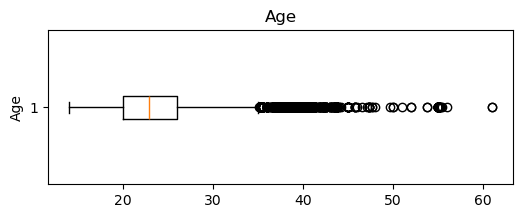

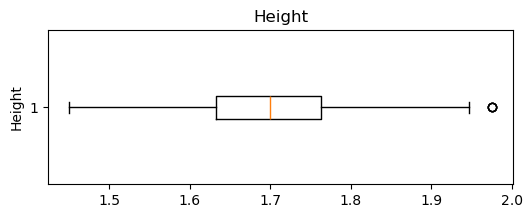

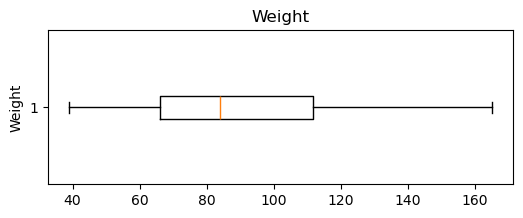

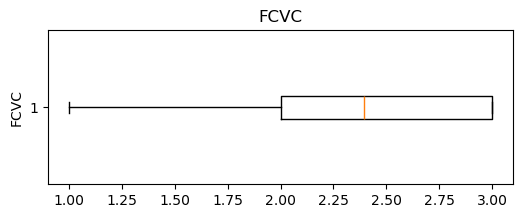

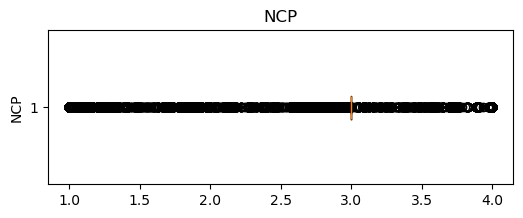

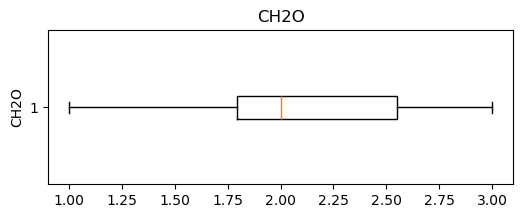

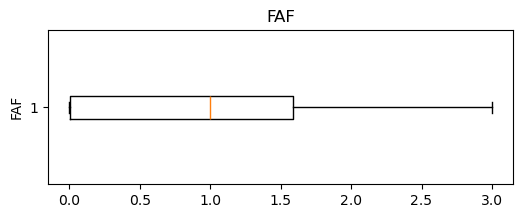

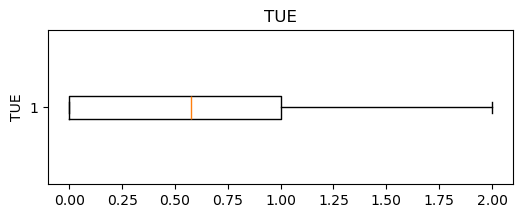

In [7]:
numerical_df = train[continuous_vars]

for idx, col in enumerate(numerical_df.columns[:]):
    plt.figure(figsize=(6, 2))
    plt.boxplot(train[col], vert=False)
    plt.title(col)
    plt.ylabel(col)
    plt.show()

* We can see the mayority of numerical features are free of outliers.
* Most outliers are in `Age`. Further analysis is needed.
* Something weird is happening with `NCP`. Further analysis is needed.

### Age distribution
As spotted above, ``Age`` distribution analisys is needed.
As we see in the boxplot, the median age is around 23, with the middle 50% of data ranging from around 20 to 26.
The distribution of age appears to be right skewed, meaning there are more younger individuals than older individuals.
There are many outliers on the older end of the distribution, starting from 35. This means we don't have a lot of older people in this dataset.

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

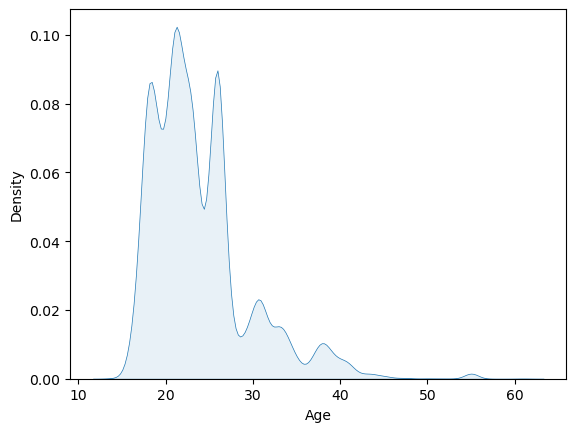

In [8]:
display(train.Age.describe())
sns.kdeplot(data=train, x="Age", fill=True, alpha=0.1, linewidth=0.5)

We can observe we have values for `Age` with decimals. This make no sense and should probably be rounded off. This might not be needed if I create Age categories.

### NPC (Number of main meals) distribution 
As spotted above, `NCP` distribution needed further analysis. We have the same problem with decimals in `NPC`. It's odd for example to have x and a half meals a day, that's why we have spikes in 1, 3 and 4 meals.

count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64

<Axes: xlabel='NCP', ylabel='Density'>

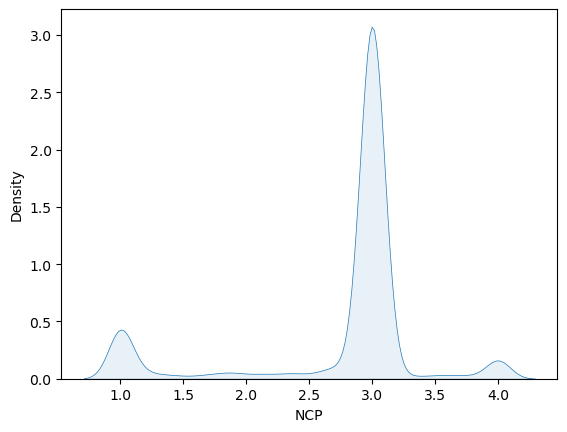

In [9]:
display(train.NCP.describe())
sns.kdeplot(data=train, x="NCP", fill=True, alpha=0.1, linewidth=0.5)

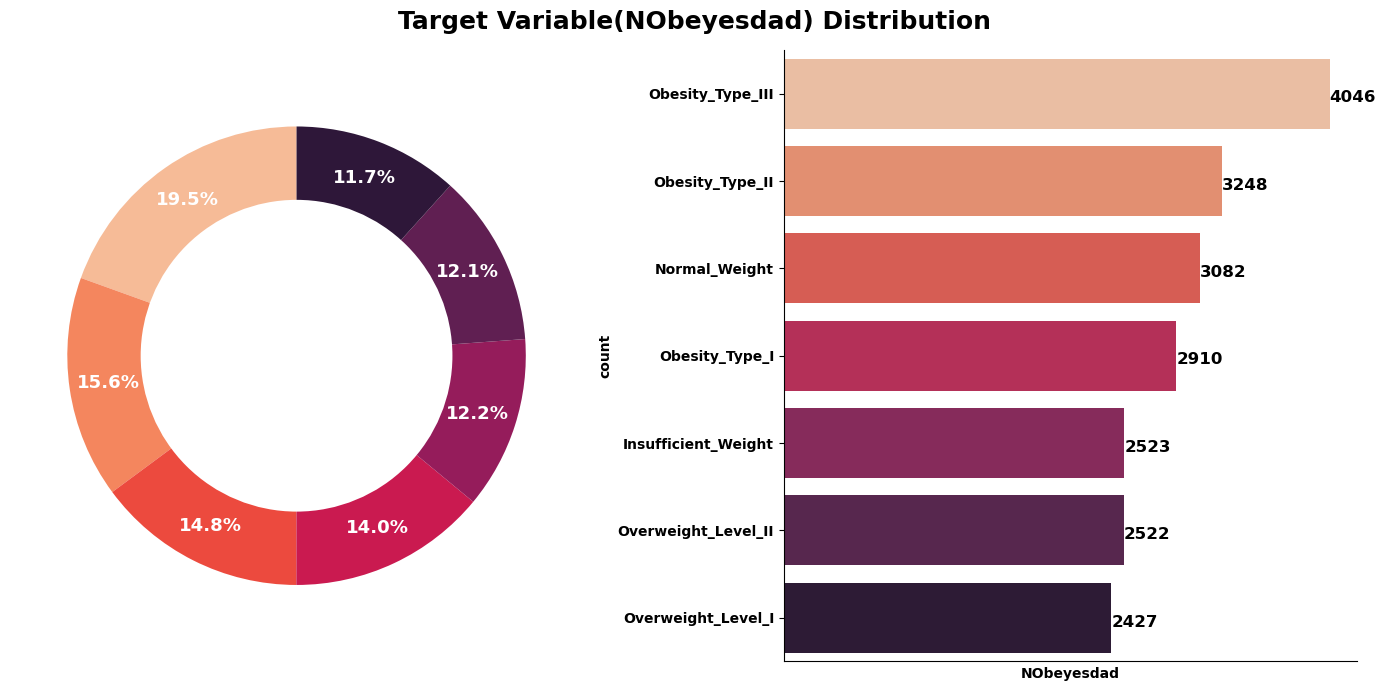

In [10]:
plot_count(train, 'NObeyesdad', title_name='Target Variable(NObeyesdad) Distribution')

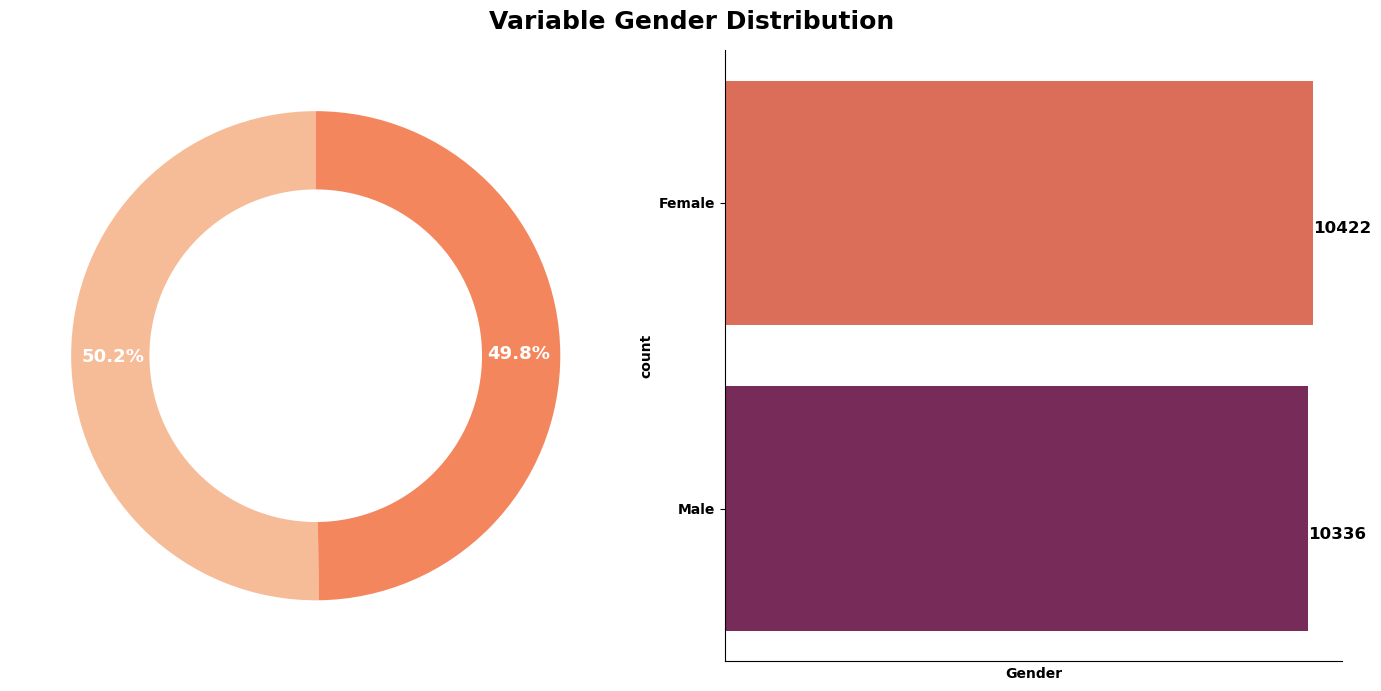

In [11]:
plot_count(train, 'Gender', title_name='Variable Gender Distribution')

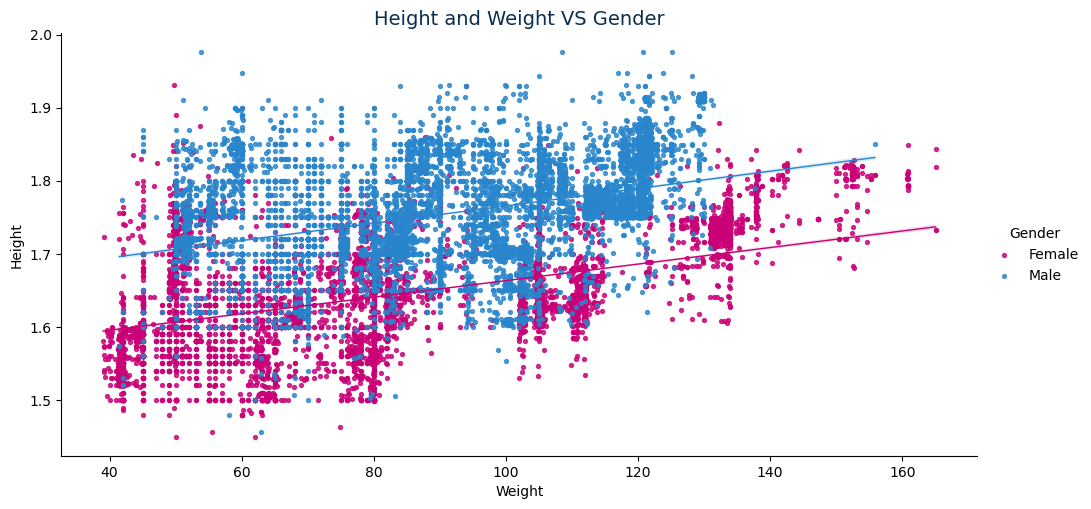

In [12]:
sns.lmplot(
    data=train,
    x="Weight",
    y="Height",
    height=5,
    aspect=2,
    hue="Gender",
    palette={"Female": "#c90076", "Male": "#2986cc"},
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
)
plt.title("Height and Weight VS Gender", fontsize=14, color="#0a2e4f")
plt.show()

### Bar-Plot of every categorical variable by target

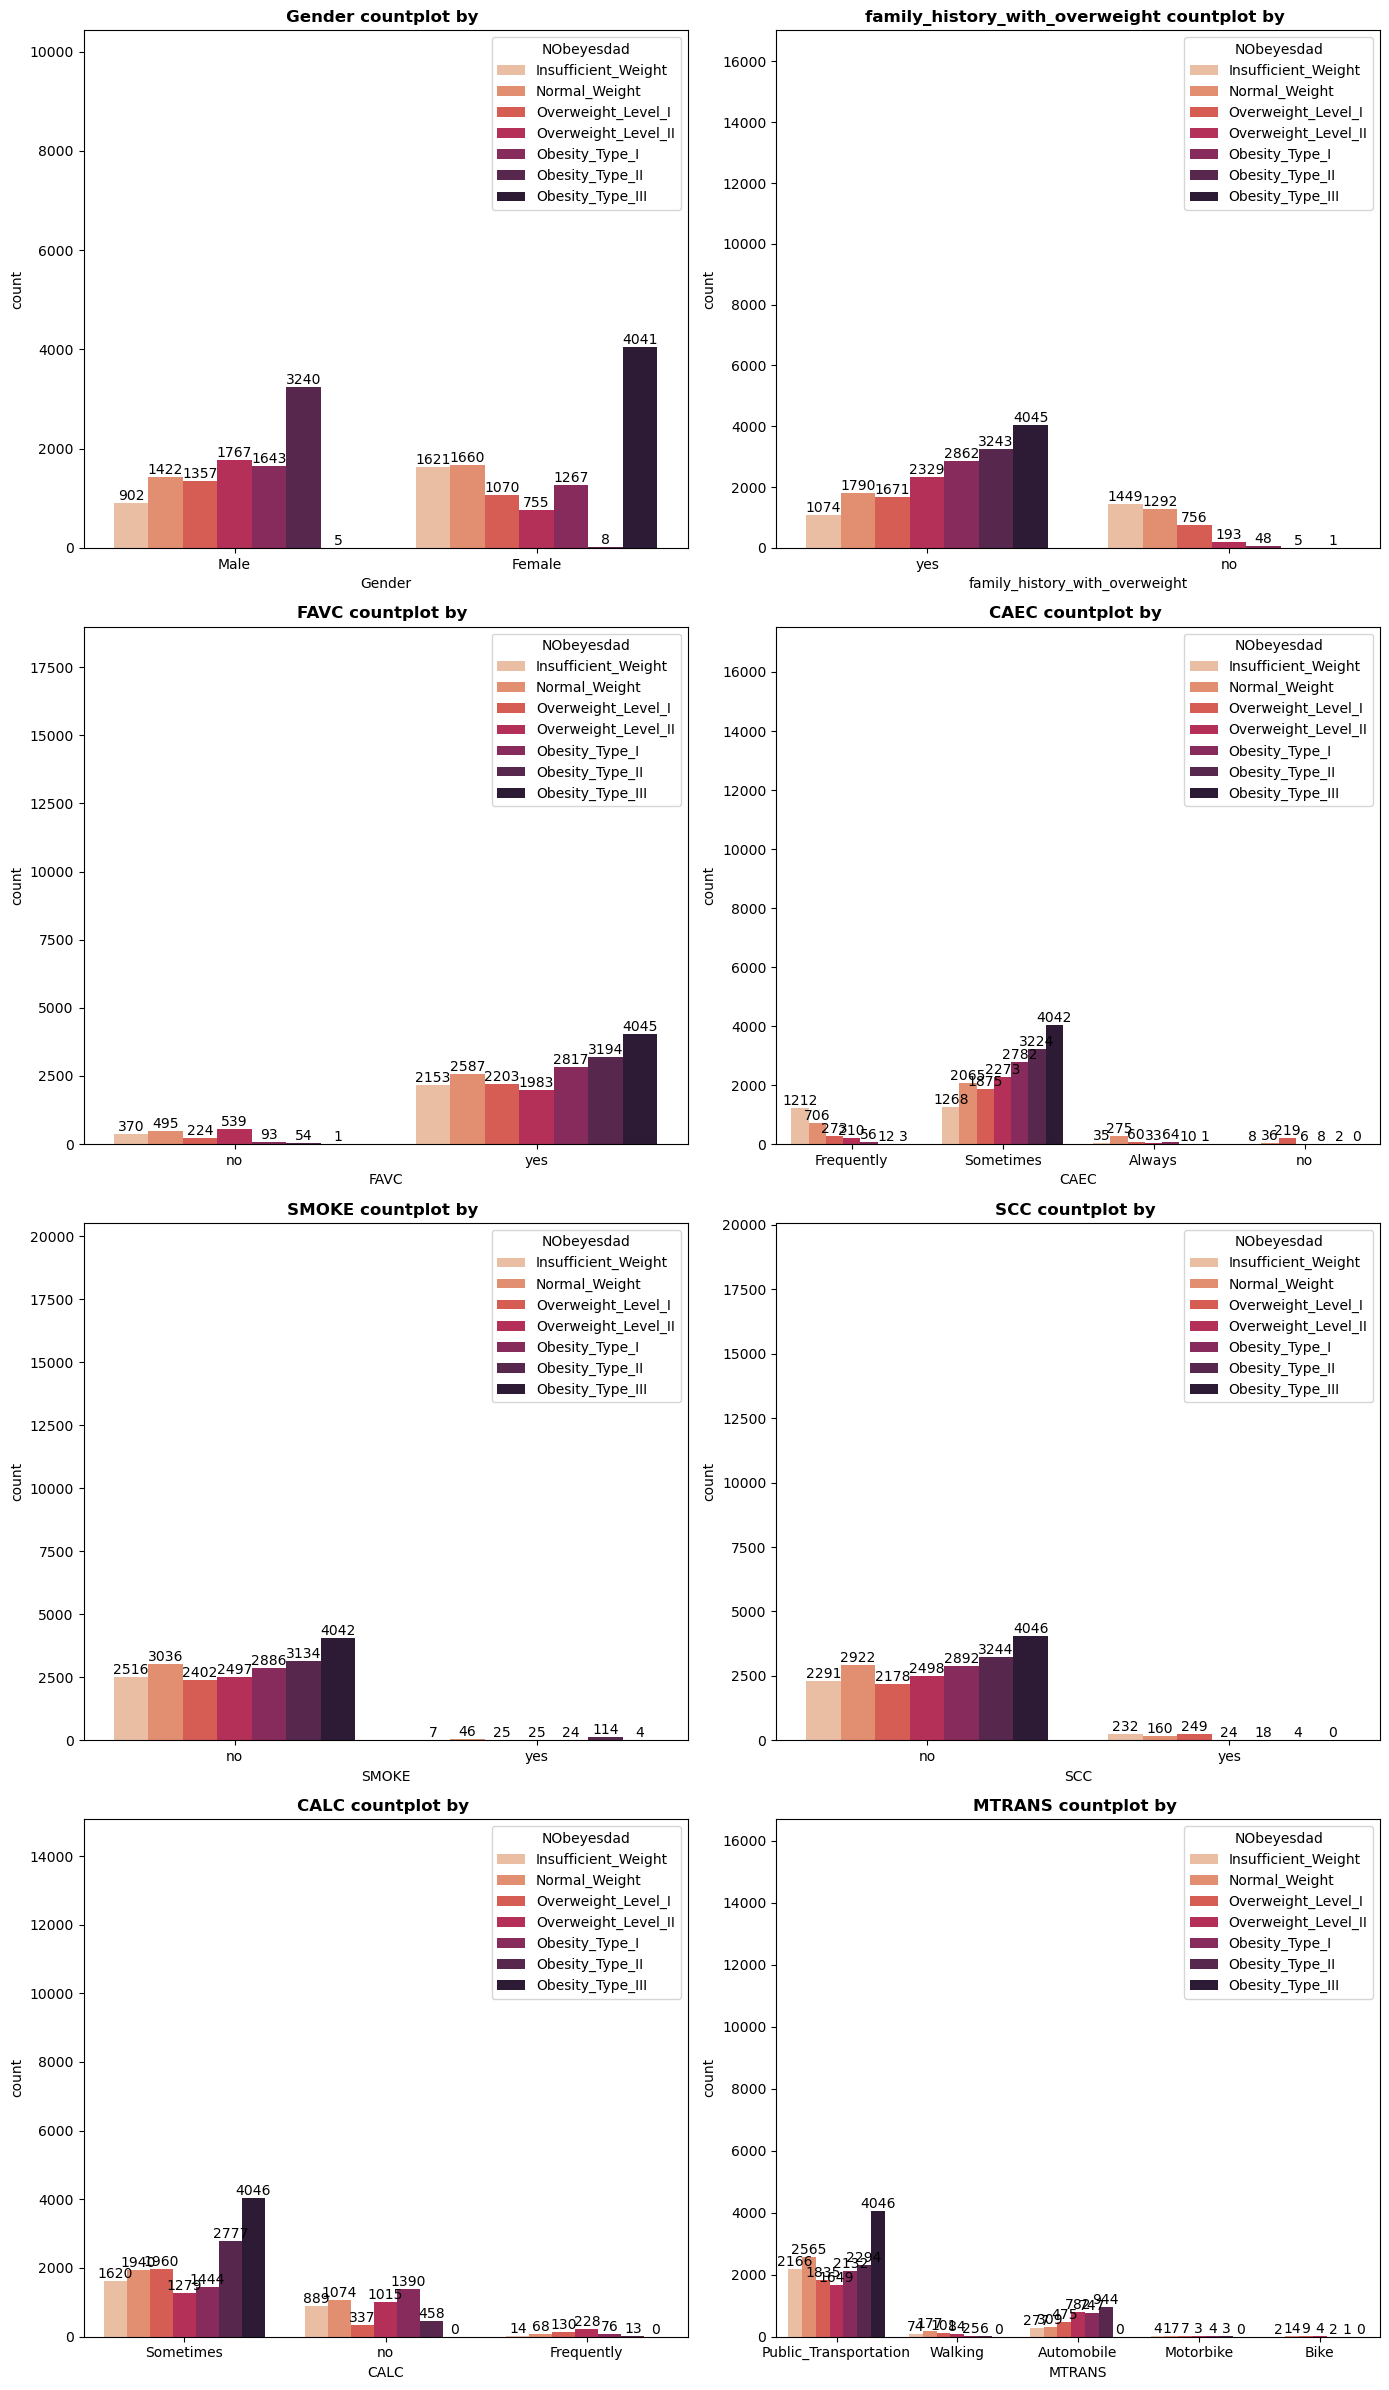

In [18]:
custom_order = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6}
train = pd.read_csv("../data/raw/train.csv").sort_values(by=['NObeyesdad'], key=lambda x: x.map(custom_order))
test = pd.read_csv("../data/raw/test.csv")
bar_plot_all_categorical(train, categorical_vars, "NObeyesdad")

(0.0, 10432.0)

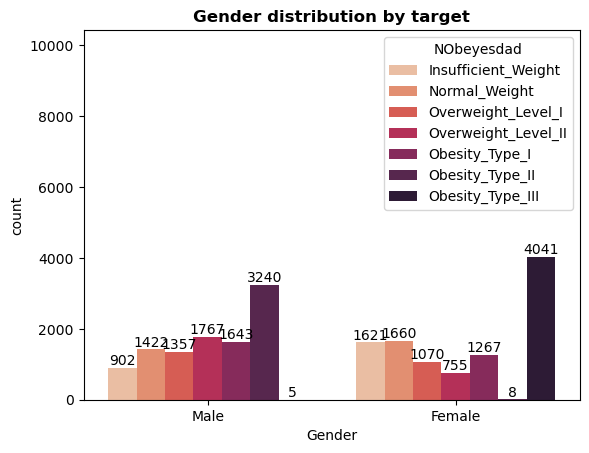

In [20]:
ax = sns.countplot(x="Gender", hue="NObeyesdad", data=train, palette='rocket_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title(f"Gender distribution by target", fontweight = 'bold')
plt.ylim(0, train["Gender"].value_counts().max() + 10)

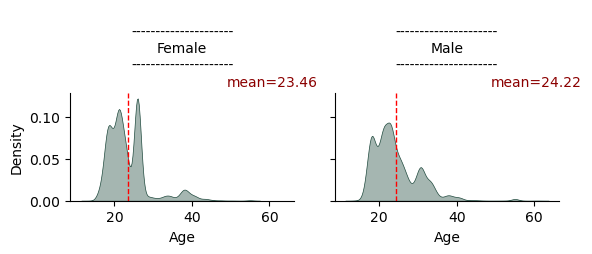

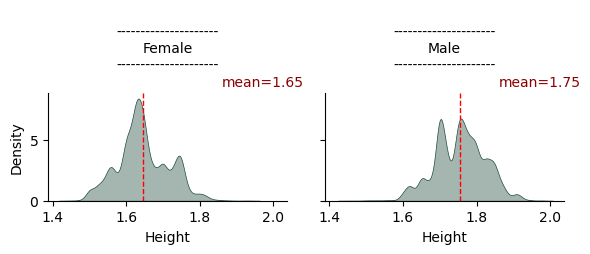

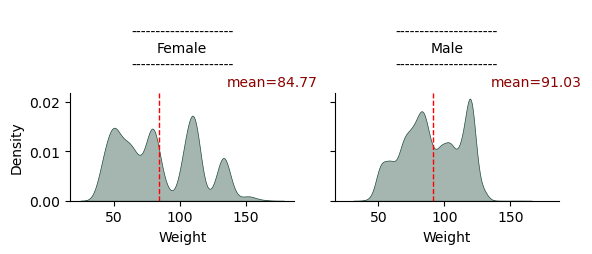

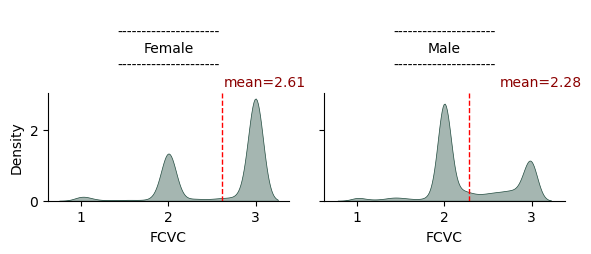

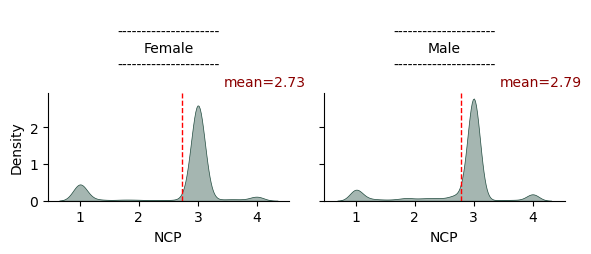

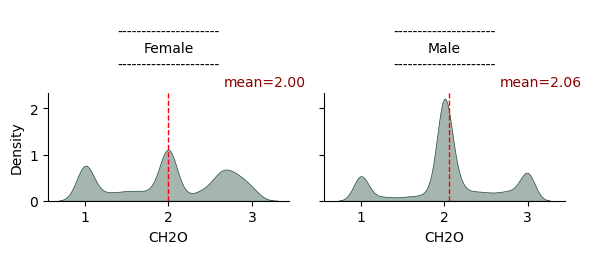

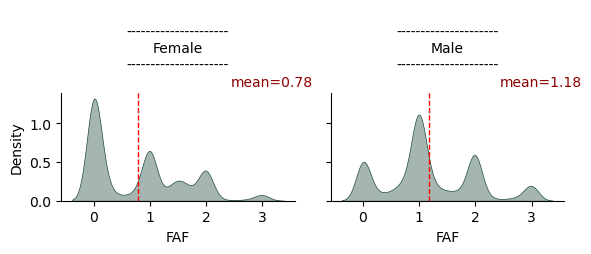

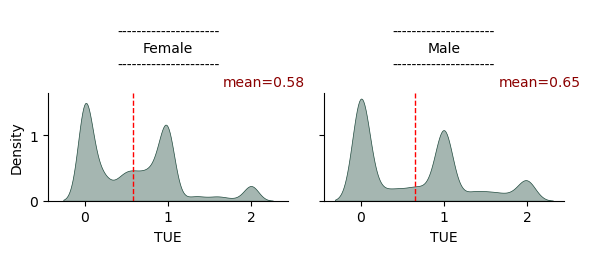

In [14]:
def mean_line(data, var=None, **kws):
    m = np.mean(data[var])
    ax = plt.gca()
    ax.axvline(m, color="red", lw=1, ls="--")
    ax.text(
        0.9,
        1.1,
        f"mean={m:.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        color="darkred",
        transform=ax.transAxes,
    )


for i in continuous_vars:
    g = sns.FacetGrid(data=train, col="Gender", height=2, aspect=1.5)
    g.map_dataframe(
        sns.kdeplot, color="#1f493d", x=i, alpha=0.4, fill=True, linewidth=0.5
    )
    g.map_dataframe(mean_line, data=train, var=i)
    g.set_titles(
        col_template="\n---------------------\n{col_name}\n---------------------\n"
    )

In [15]:
obesity_list = ["Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
obese_df_obesities = train.query("NObeyesdad in @obesity_list")
obese_df_obesities["NObeyesdad"]  = obese_df_obesities["NObeyesdad"].cat.remove_unused_categories()

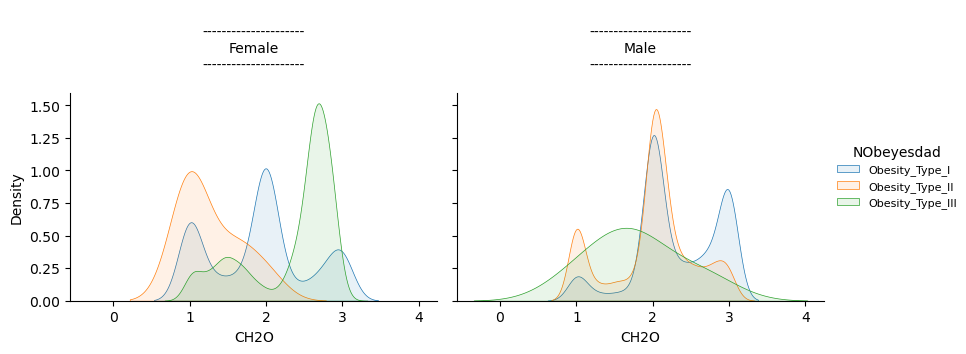

In [16]:
g = sns.FacetGrid(
    data=obese_df_obesities[["Gender", "CH2O", "NObeyesdad"]],
    col="Gender",
    hue="NObeyesdad",
    palette="tab10",
    height=3,
    aspect=1.4,
)
g.map_dataframe(sns.kdeplot, x="CH2O", fill=True, alpha=0.1, linewidth=0.5)
g.set_titles(
    col_template="\n---------------------\n{col_name}\n---------------------\n"
)
g.add_legend(fontsize=8)


plt.show()

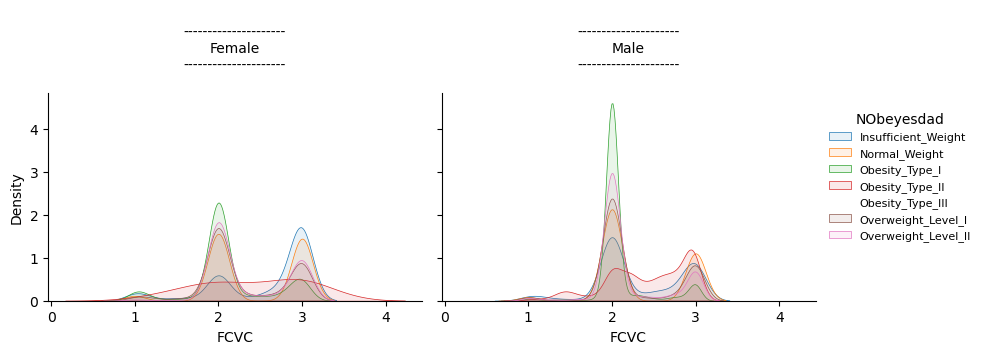

In [17]:
g = sns.FacetGrid(
    data=train[["Gender", "FCVC", "NObeyesdad"]],
    col="Gender",
    hue="NObeyesdad",
    palette="tab10",
    height=3,
    aspect=1.4,
)
g.map_dataframe(sns.kdeplot, x="FCVC", fill=True, alpha=0.1, linewidth=0.5)
g.set_titles(
    col_template="\n---------------------\n{col_name}\n---------------------\n"
)
g.add_legend(fontsize=8)


plt.show()

(0.9, 0.92)

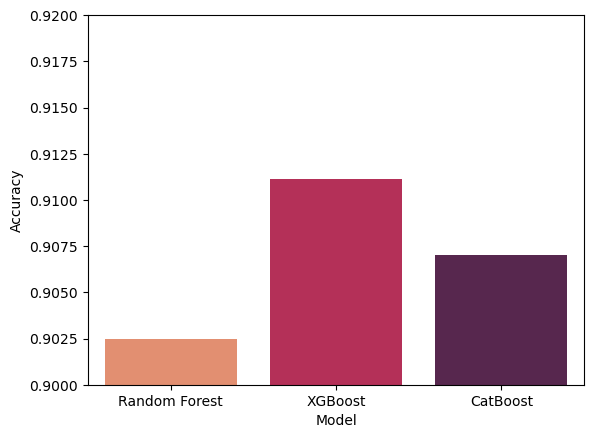

In [9]:
data = [['Random Forest', 0.90245664], ['XGBoost', 0.91112716], ['CatBoost', 0.90703275]]
df = pd.DataFrame(data, columns=['Model', 'Accuracy'])
sns.barplot(df, x="Model", y="Accuracy", palette="rocket_r")
plt.ylim(0.90, 0.92)